### **MATLAB Implementation**

Run `Code` in MATLAB to:
- Train the CNN
- Evaluate its performance
- Visualize Grad-CAM results

---

## **Citation**
If you use this dataset or code, please cite the following paper:

@inproceedings{your_paper_citation, title={Enhancing Defect Recognition: Convolutional Neural Networks for Silicon Wafer Map Analysis}, author={Muhammad Junayed, Tanzeem Tahmeed Reza, Md. Saiful Islam}, booktitle={2024 3rd International Conference on Advancement in Electrical and Electronic Engineering (ICAEEE)}, year={2024}, organization={IEEE} }

In [ ]:
% Data Load
imds = imageDatastore('C:\Matlab\For data set\For sir', ...
    'IncludeSubfolders', true, 'Labelsource', 'foldernames');

In [ ]:

% Display some of the images in the datastore
figure;
perm = randperm(902, 20);
for i = 1:20
    subplot(4, 5, i);
    imshow(imds.Files{perm(i)});
end

The result should display this images 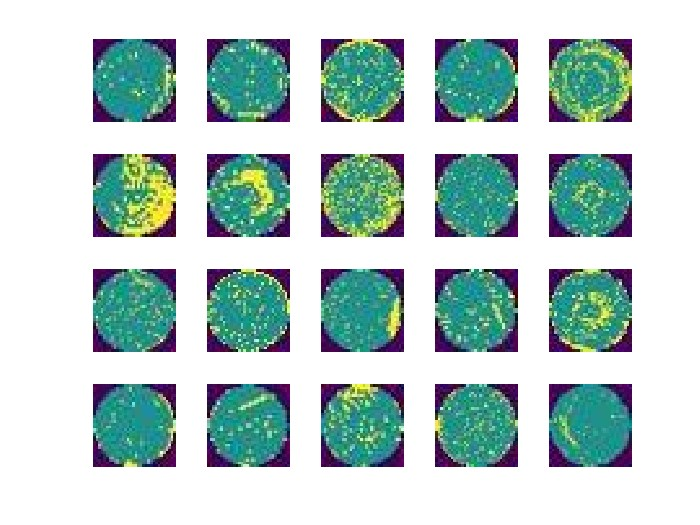

In [ ]:
% Calculating the number of images in each category
labelCount = imds.countEachLabel;

% Specifying the size of the images in the input layer of the network
img = readimage(imds, 1);
size(img)

In [ ]:
% Dividing the data into training and validation data sets
[imdsTrain, imdsValidation] = splitEachLabel(imds, 0.8, 'randomize');


In [ ]:
% Defining the convolutional neural network architecture
layers = [
    imageInputLayer([32 32 3])
  
    convolution2dLayer(4, 64, 'Padding', 'same')
    batchNormalizationLayer
    reluLayer
    maxPooling2dLayer(2, 'Stride', 2)
    convolution2dLayer(3, 128, 'Padding', 'same')
    batchNormalizationLayer
    reluLayer
    convolution2dLayer(2, 264, 'Padding', 'same')
    batchNormalizationLayer
    reluLayer
    maxPooling2dLayer(2, 'Stride', 2)
    convolution2dLayer(2, 264, 'Padding', 'same')
    batchNormalizationLayer
    reluLayer
    maxPooling2dLayer(2, 'Stride', 2)
    convolution2dLayer(2, 128, 'Padding', 'same')
    batchNormalizationLayer
    reluLayer
    maxPooling2dLayer(2, 'Stride', 2)
    fullyConnectedLayer(128)
    fullyConnectedLayer(128)
    fullyConnectedLayer(10)
    softmaxLayer
    classificationLayer];


In [ ]:
% Specifying the training options
options = trainingOptions('sgdm', ...
    'InitialLearnRate', 0.01, ...
    'MaxEpochs', 50, ...
    'MinibatchSize',128,...
    'Shuffle', 'every-epoch', ...
    'ValidationData', imdsValidation, ...
    'ValidationFrequency', 35, ...
    'Verbose', true, ...
    'Plots', 'training-progress');


In [ ]:

% Training the network
net = trainNetwork(imdsTrain, layers, options);
% Evaluate on validation set
YPred = classify(net, imdsValidation);
YValidation = imdsValidation.Labels;


In Matlab the result will show like this:
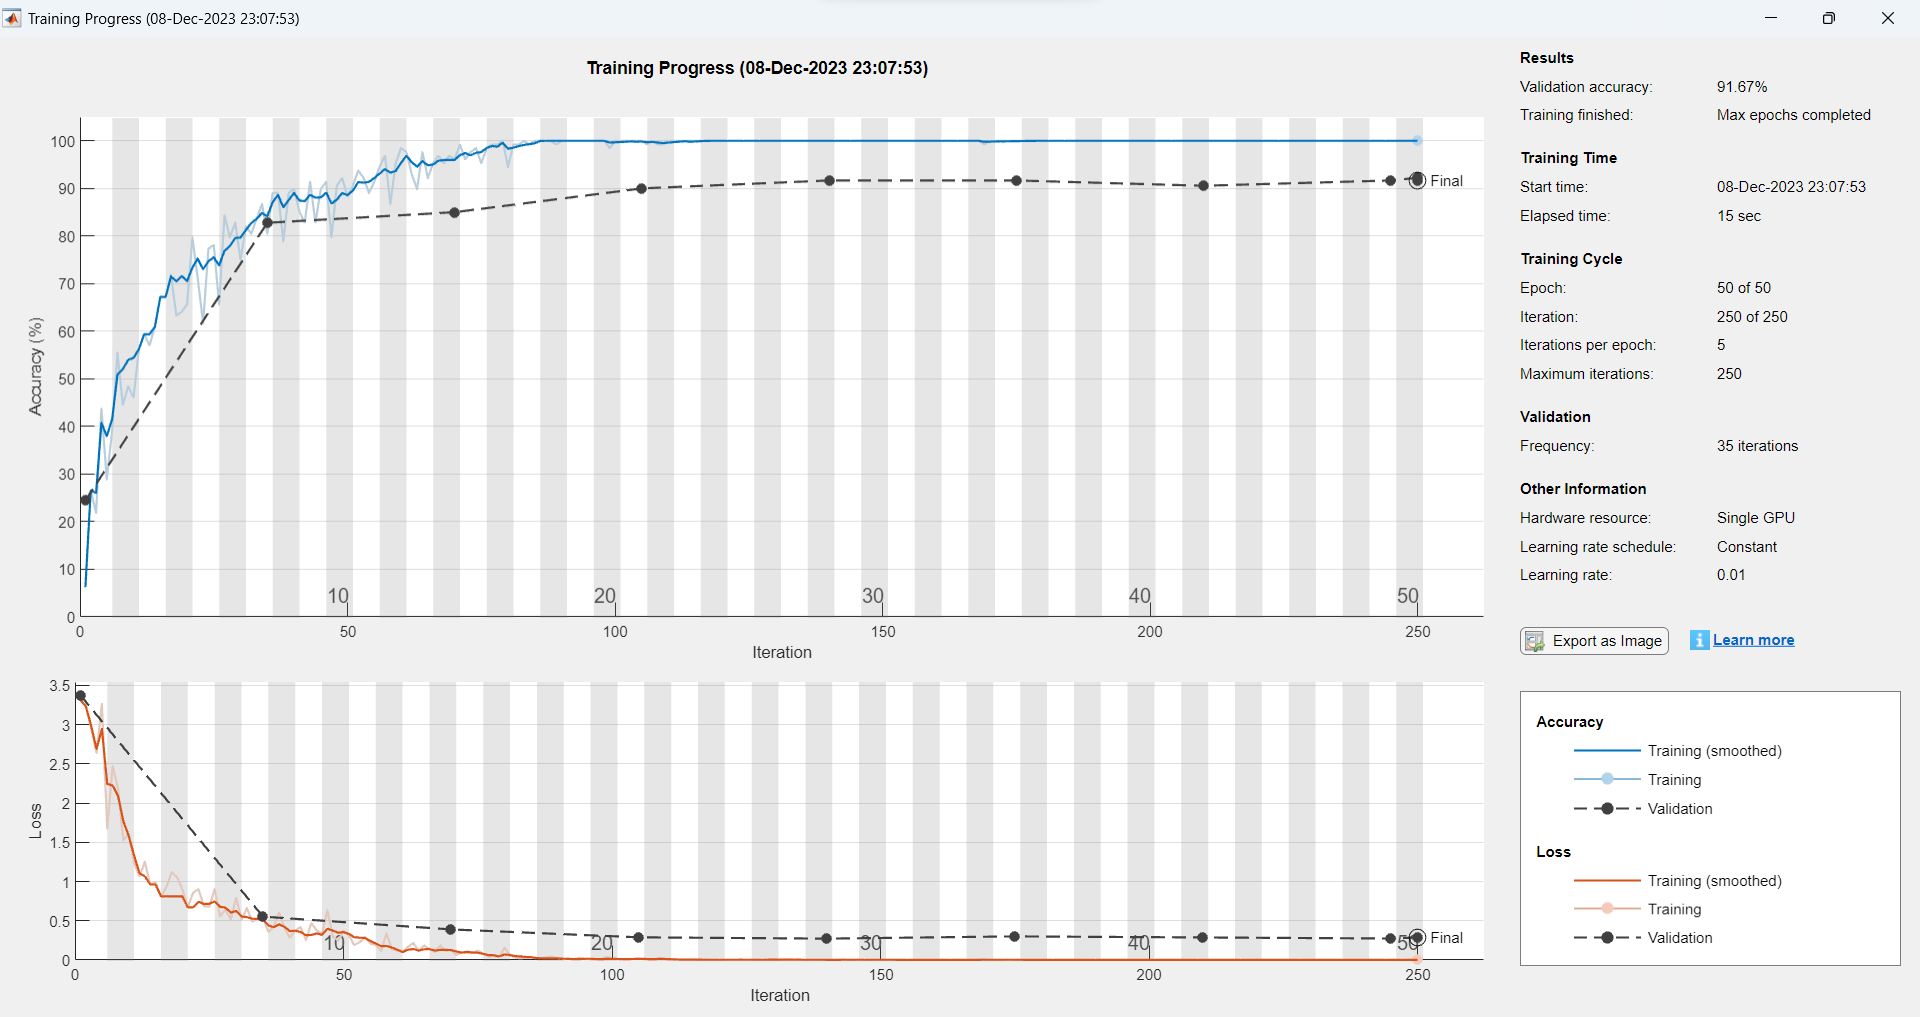

In [ ]:
% Calculate and display the confusion matrix
figure;
plotconfusion(YPred, YValidation);

% Calculate and display accuracy
accuracy = sum(YPred == YValidation) / numel(YValidation);
fprintf('Validation Accuracy: %.2f%%\n', accuracy * 100);

% Calculate confusion matrix
confMat = confusionmat(YValidation, YPred);

estimated example: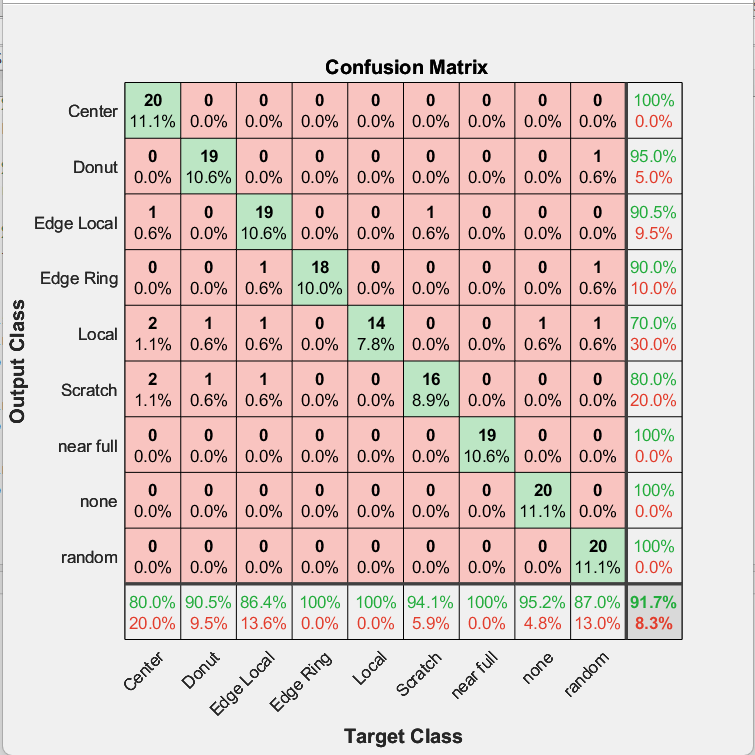

In [ ]:
% Calculate precision, recall, and F1 score for each class
numClasses = size(confMat, 1);
precision = zeros(numClasses, 1);
recall = zeros(numClasses, 1);
f1_score = zeros(numClasses, 1);

for i = 1:numClasses
    truePositives = confMat(i, i);
    falsePositives = sum(confMat(:, i)) - truePositives;
    falseNegatives = sum(confMat(i, :)) - truePositives;

    % Calculate precision
    precision(i) = truePositives / (truePositives + falsePositives);

    % Calculate recall
    recall(i) = truePositives / (truePositives + falseNegatives);

    % Calculate F1 score (harmonic mean of precision and recall)
    f1_score(i) = 2 * (precision(i) * recall(i)) / (precision(i) + recall(i));
end

% Display F1 scores for each class
fprintf('F1 Scores:\n');
disp(f1_score);
fprintf('Recall:\n');
disp(recall);
fprintf('Precision:\n');
disp(precision);

Gradcam Visualizaton(take a Image and see the Highlight)

In [ ]:
%Grad-cam
X = imread("643685.jpg");
inputSize = net.Layers(1).InputSize(1:2);
X = imresize(X,inputSize);
subplot(1,2,1)
imshow(X)
title('Original Image');
label = classify(net,X)
scoreMap = gradCAM(net,X,label);
figure
subplot(1,2,2)
imshow(X)
hold on
imagesc(scoreMap,'AlphaData',0.5)
title('Grad-CAM Visualization');
colormap jet
colorbar

An example:
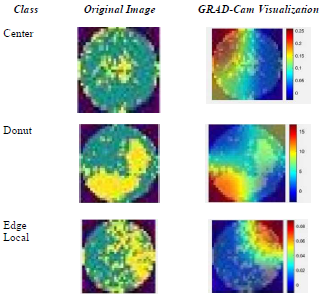